## How windy/explosive does it need to be for a 60 micron rhyolite grain to travel 1100 km?

This workbook uses the method in the Stevenson et al (2015) _Big grains go far..._ to estimate the minimum size of plume that would be required to send a 60 micron rhyolite ash particle to a distance of 1100 km.
This corresponds to rhyolite ash grains in the Fur Formation, Denmark having been transported from a volcano at what is now Lundy island in the Bristol channel, west of southern England.
It makes the unrealistic assumption of the wind blowing at a constant velocity at all altitudes and in a straight line, but at least gives a ball-park figure for what is possible.

See Section 3: Model constraints on cryptotephra transport

https://amt.copernicus.org/articles/8/2069/2015/amt-8-2069-2015.html

Assumptions:

- particle diameter: 60 microns
- rhyolite glass density: 2,300 kg/m3
- Ganser fall velocity model
- grain sphericity of 0.7
- size-dependent density, using Bonadonna and Philips 2003 scheme
- reasonable windspeed range: 5 - 25 m/s
- reasonable plume height: 10 - 35 km (Sub-Plinian to Plinian)
- wind speed constant with height
- straight line travel distance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipdb

from tephrange import particle

In [2]:
# Define calculation functions
def travel_distance(release_height, windspeed):
    p = particle.Particle(diameter=0.000060, sphericity=0.7)
    p.set_size_dependant_density(rho_pumice=440, rho_glass=2300)  # rhyolite
    return p.calculate_distance(release_height=release_height, windspeed=windspeed,
                                fall_step=100)

to_travel_distance_array = np.frompyfunc(travel_distance, 2, 1)

In [3]:
# Define input values and apply
release_heights = np.arange(1000, 36000, 2000)
windspeeds = np.arange(5, 26, 2)

heights_and_speeds = np.array(np.meshgrid(release_heights, windspeeds)).T
result = to_travel_distance_array.reduce(heights_and_speeds, axis=2)

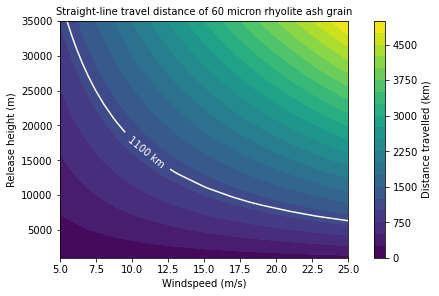

In [4]:
# Plot result
fig, ax = plt.subplots(constrained_layout=True)
contour_set = ax.contourf(windspeeds, release_heights, result, levels=20)
cbar = fig.colorbar(contour_set)
cbar_label = cbar.ax.set_ylabel('Distance travelled (km)')

# Add 1100 km contour
c1100 = ax.contour(windspeeds, release_heights, result, levels=(1100,), colors='w')
ax.clabel(c1100, fmt="%d km")

# Label axes
xlabel = ax.set_xlabel('Windspeed (m/s)')
ylabel = ax.set_ylabel('Release height (m)')
title = ax.set_title("Straight-line travel distance of 60 micron rhyolite ash grain",
                     fontsize='medium')

# Save figure
fig.savefig('60_micron_rhyolite_1100km.png', dpi=300)

## Result

Observed average windspeeds for transport of Icelandic ash to Europe range from 6 to 19 m/s over distances of 1,000 to 3,000 km.  For a windspeed greater than around 8 m/s, a sub-Plinian eruption (column height of 10 to 25 km) can release a 60 micron rhyolite ash grain high enough to travel 1,100 km.  A Plinian eruption (column height of over 25 km) is required if the wind speed is lower than this.